In [355]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [356]:
X = np.matrix([[1,1000,10],[1,2000,30],[1,4500,60],[1,5000,80]])
Y = np.matrix([[10],[15],[30],[50]])
X

matrix([[   1, 1000,   10],
        [   1, 2000,   30],
        [   1, 4500,   60],
        [   1, 5000,   80]])

In [357]:
XT = X.T

In [358]:
XTX_inv = np.dot(XT,X).I

In [359]:
B = np.dot(XTX_inv , np.dot(XT,Y))

In [360]:
B

matrix([[ 4.   ],
        [-0.008],
        [ 1.05 ]])

In [361]:
y_hat = np.dot(X,B)

In [362]:
y_hat

matrix([[ 6.5],
        [19.5],
        [31. ],
        [48. ]])

In [363]:
epsilon = Y-y_hat
epsilon

matrix([[ 3.5],
        [-4.5],
        [-1. ],
        [ 2. ]])

In [364]:
epsilon_T = epsilon.T

In [365]:
SSR = np.dot(epsilon_T,epsilon)

In [366]:
SSR

matrix([[37.5]])

In [367]:
eps = np.sqrt(SSR)

In [368]:
eps

matrix([[6.12372436]])

In [369]:
yhat = np.dot([[1,10000,160]],B)
yhat

matrix([[92.]])

<IPython.core.display.Javascript object>


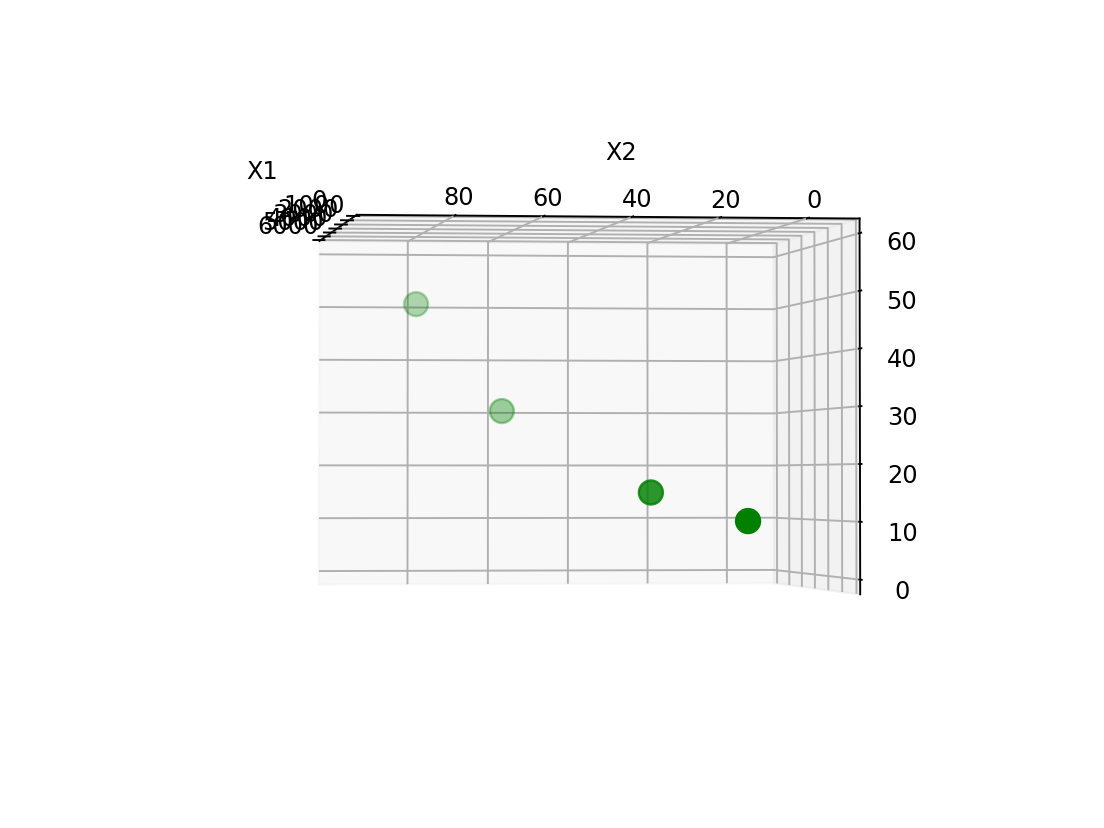

In [370]:
plt3d = plt.figure().gca(projection = '3d')
X1 = np.array(X[:,1])
X2 = np.array(X[:,2])
xx , yy = np.meshgrid(range(min(X1)[0],max(X1)[0]), range(min(X2)[0],max(X2)[0]))
plt3d.scatter(np.array(X[:,1]),np.array(X[:,2]),np.array(Y[:,0]),color = 'g',s=100)
#plt3d.plot_surface(xx,yy,np.array(B[0,0]+B[1,0]*xx+B[2,0]*yy),color = 'r')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


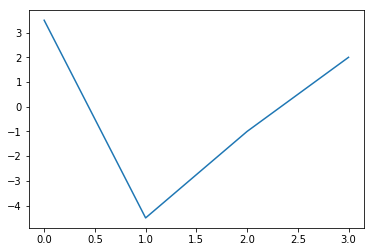

In [17]:
plt1 = plt.figure()
plt.plot(range(4),np.array(epsilon))
plt.show()

In [294]:
def make_X_mat(dataset):
    X = []
    for i in range(len(dataset)):
        X.append([1])
        X[i]+=(dataset[i])
    return np.matrix(X)

In [295]:
def get_Beta(X,Y):
    XT = X.T
    XTX_inv = np.dot(XT,X).I
    return np.dot(XTX_inv , np.dot(XT,Y))

In [339]:
def predict(X,B):
    return(np.dot(X,B))

In [340]:
X = np.array([1,2,3])

In [341]:
df = pd.read_csv('bike sharing hour.csv')
list(df)
df.drop(['dteday'],1,inplace = True)
df.drop(['instant'],1,inplace = True)
full_data = df.astype(float).values.tolist()

In [342]:
Xdat = df.drop(['cnt'],1).astype(float).values.tolist()

In [343]:
Y = np.matrix(full_data)[:,-1]

In [344]:
X = make_X_mat(Xdat)

In [345]:
B =get_Beta(X,Y)

In [346]:
yhat = predict(X,B)

In [347]:
Y

matrix([[16.],
        [40.],
        [32.],
        ...,
        [90.],
        [61.],
        [49.]])

In [348]:
print(Y)
yhat

[[16.]
 [40.]
 [32.]
 ...
 [90.]
 [61.]
 [49.]]


matrix([[16.],
        [40.],
        [32.],
        ...,
        [90.],
        [61.],
        [49.]])

In [349]:
Y-yhat

matrix([[ 2.70006240e-13],
        [ 2.91322522e-13],
        [ 3.83693077e-13],
        ...,
        [-4.58157956e-11],
        [-4.54818405e-11],
        [-4.47855086e-11]])

In [350]:
eps = Y-yhat

<IPython.core.display.Javascript object>


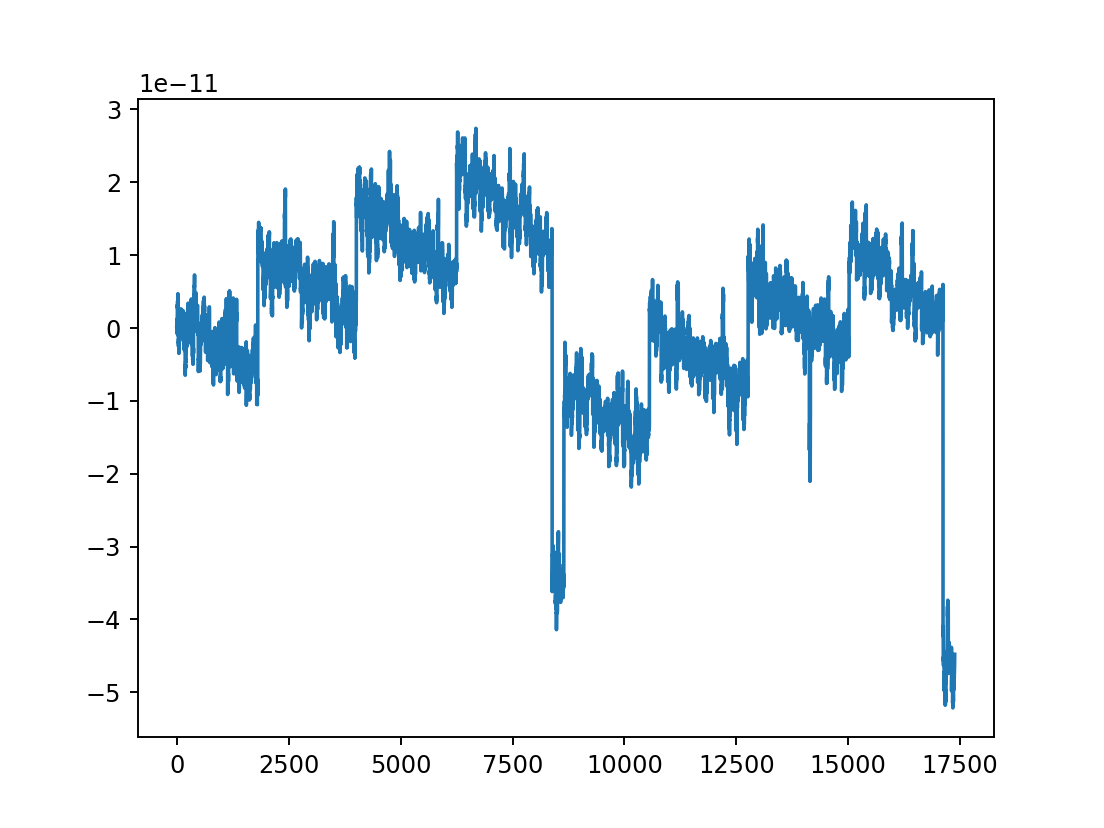

In [354]:
plt1 = plt.figure()
plt.plot(range(1,len(Xdat)+1),np.array(eps))
plt.show()